In [105]:
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

In [112]:
with open('../data/automl_metrics.pkl', 'rb') as f:
    auto_ml_metrics = pickle.load(f)
    
with open('../data/local_model_metrics.pkl', 'rb') as f:
    local_modal_metrics = pickle.load(f)

In [113]:
all_metrics = local_modal_metrics
all_metrics['AutoML'] = auto_ml_metrics

In [115]:
test_df_to_validate = pd.read_csv('../data/testing.csv')

In [116]:
y_true = test_df_to_validate['Target'].apply(lambda x: 0 if x == "Normal" else 1)
y_true = y_true.to_list()

In [117]:
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

In [128]:
df = pd.DataFrame()
for model_name, item in all_metrics.items():
    # the different model names are the columns, and the metrics are the rows
    df[model_name] = calculate_metrics(y_true, item['predictions']).values()
    df.index = calculate_metrics(y_true, item['predictions']).keys()

In [129]:
df

logistic_regression  random_forest   xgboost  gradient_boosting  \
accuracy              0.990196       0.994118  0.996078           0.993137   
precision             0.700000       0.928571  1.000000           0.923077   
recall                0.777778       0.722222  0.777778           0.666667   
f1                    0.736842       0.812500  0.875000           0.774194   

                svc       knn    AutoML  
accuracy   0.995098  0.992157  0.994118  
precision  1.000000  1.000000  0.928571  
recall     0.722222  0.555556  0.722222  
f1         0.838710  0.714286  0.812500

In [ ]:
# plot confusion matrix for each model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix

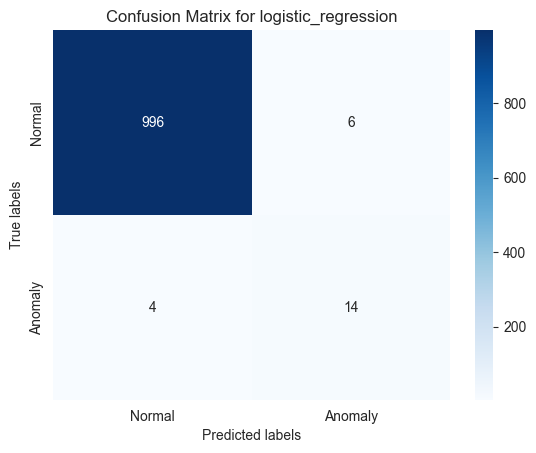

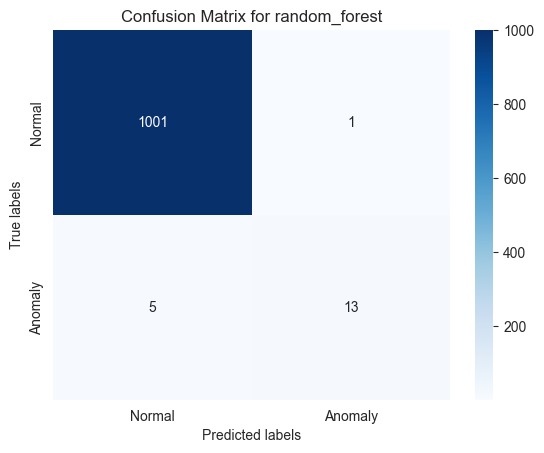

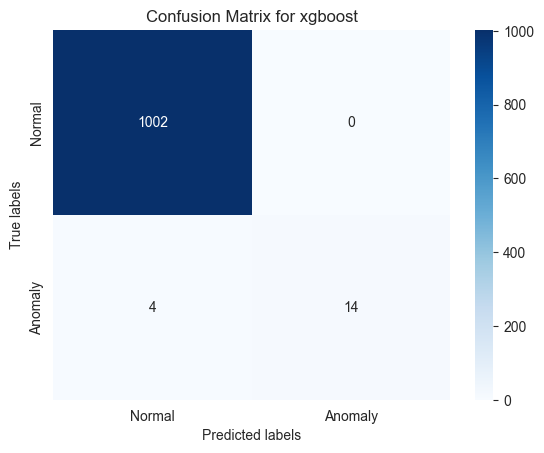

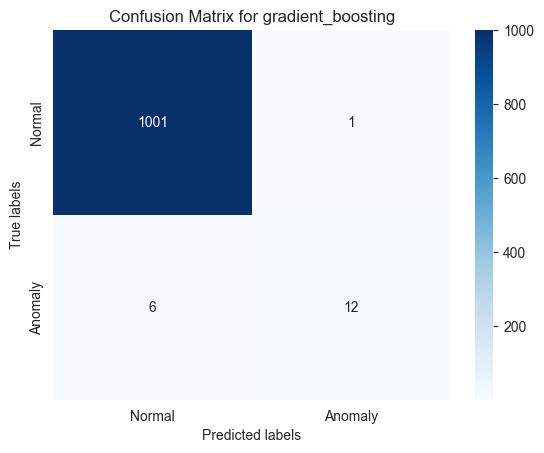

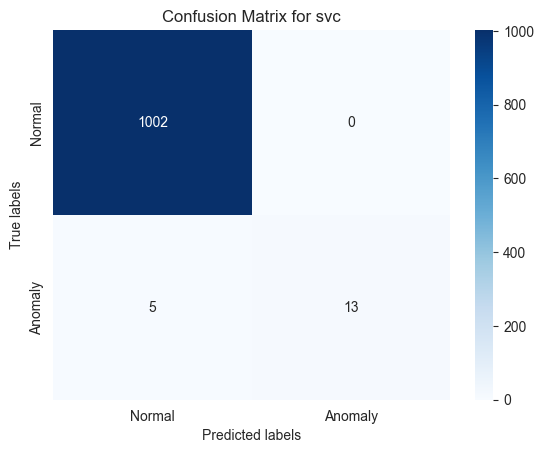

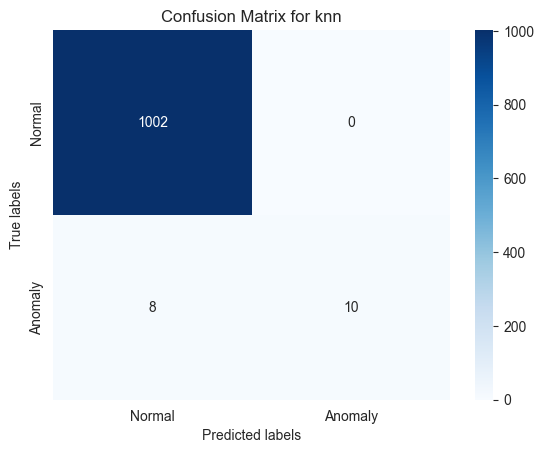

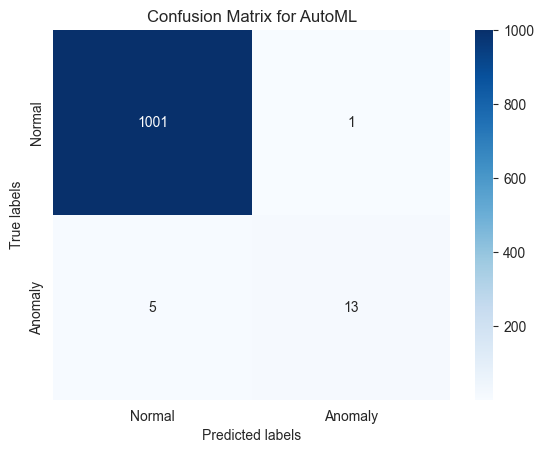

In [133]:
for model_name, items in all_metrics.items():
    cm = confusion_matrix(y_true, items['predictions'])
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f'Confusion Matrix for {model_name}')
    ax.xaxis.set_ticklabels(['Normal', 'Anomaly'])
    ax.yaxis.set_ticklabels(['Normal', 'Anomaly'])
    plt.savefig(f'../plots/confusion_matrix/confusion_matrix_{model_name}.png')
    plt.show()

In [134]:
# plot roc curve combining all models
from sklearn.metrics import roc_curve, auc

# ROC Curve

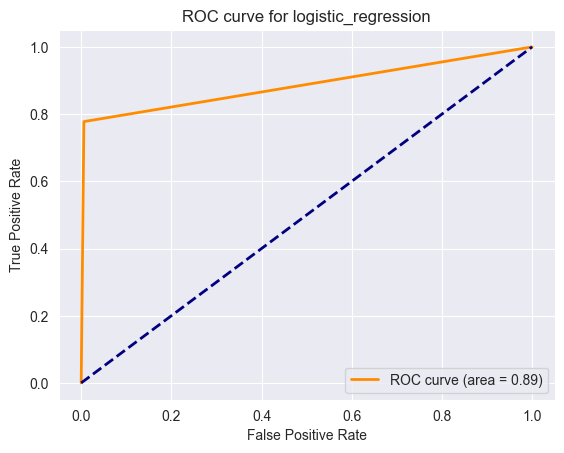

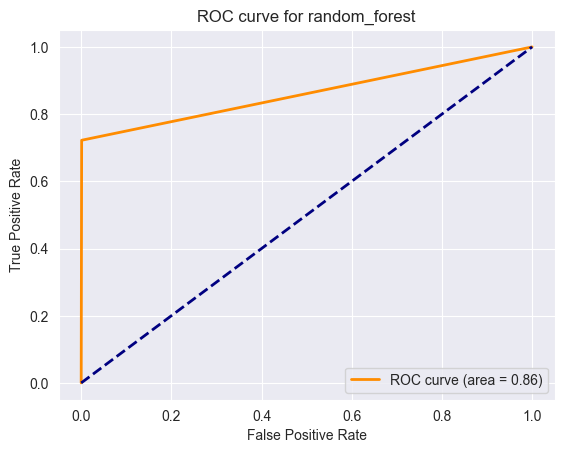

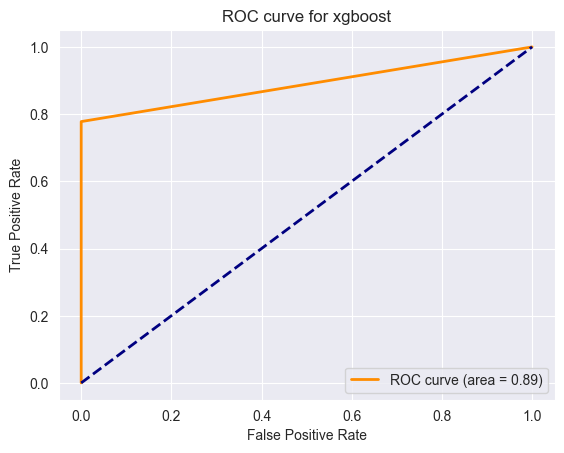

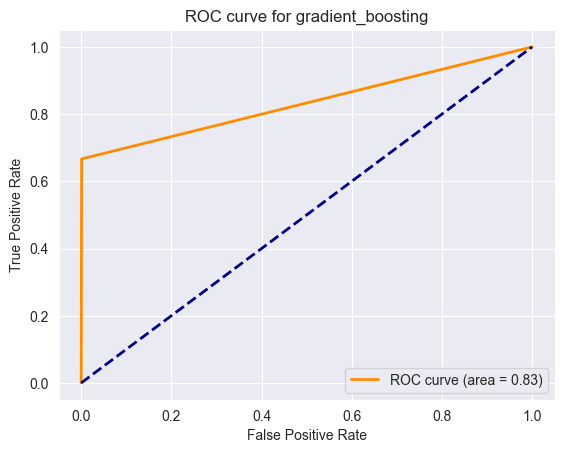

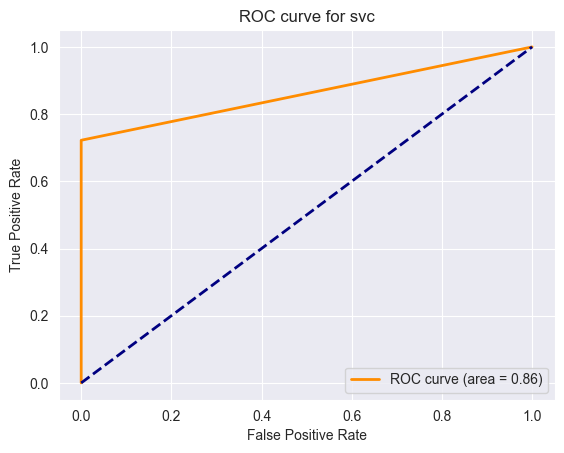

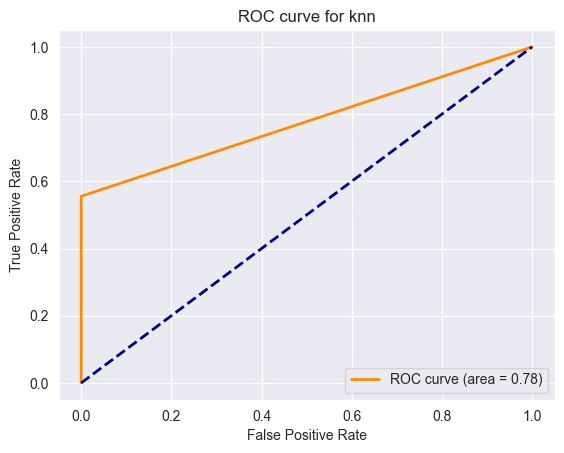

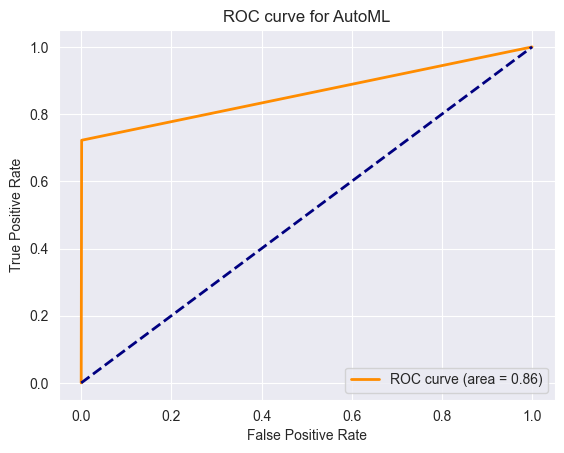

In [137]:
for model_name, items in all_metrics.items():
    fpr, tpr, _ = roc_curve(y_true, items['predictions'])
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.title(f'ROC curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.savefig(f'../plots/roc_curve/roc_curve_{model_name}.png')
    plt.show()

# Precision Recall Curve

In [138]:
from sklearn.metrics import precision_recall_curve

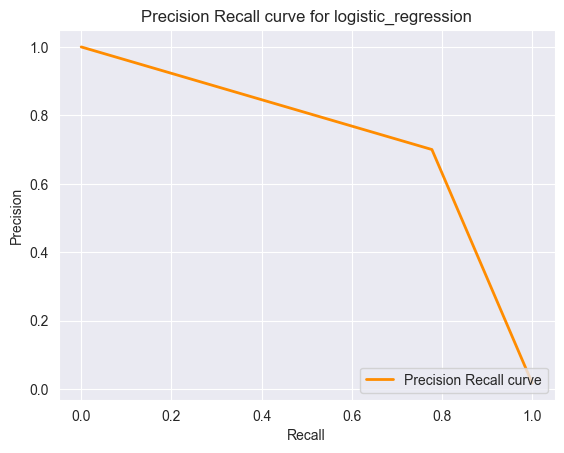

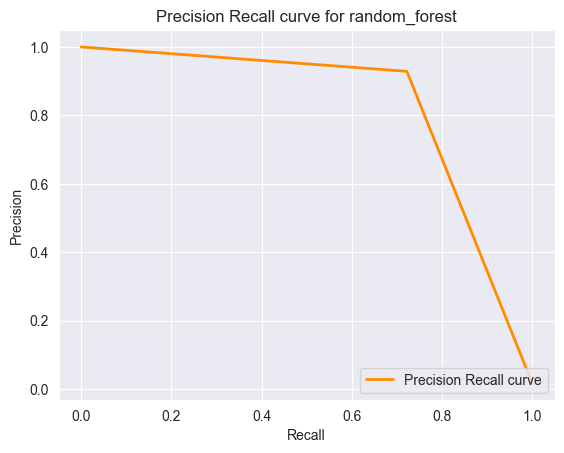

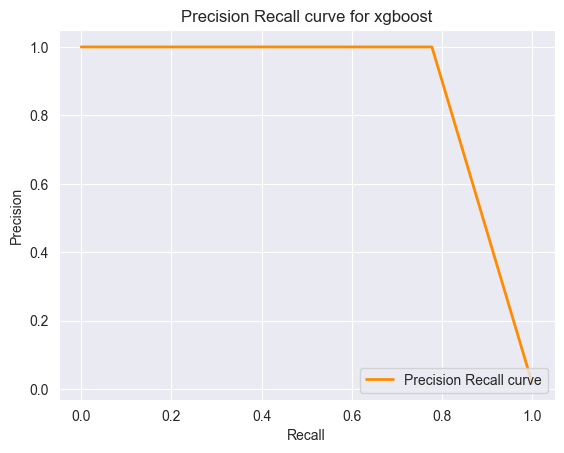

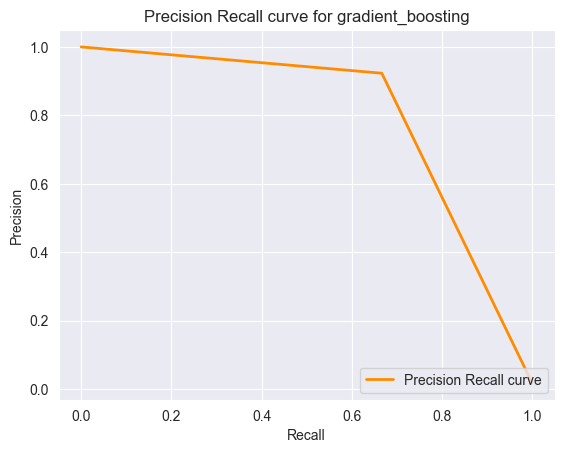

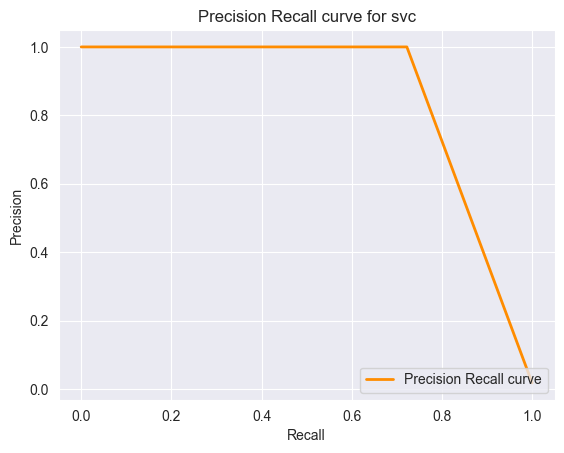

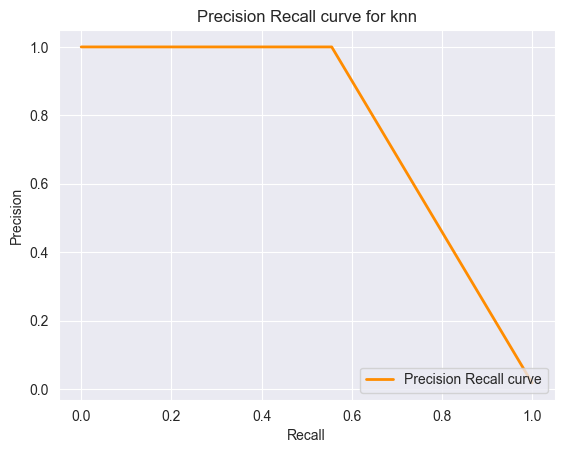

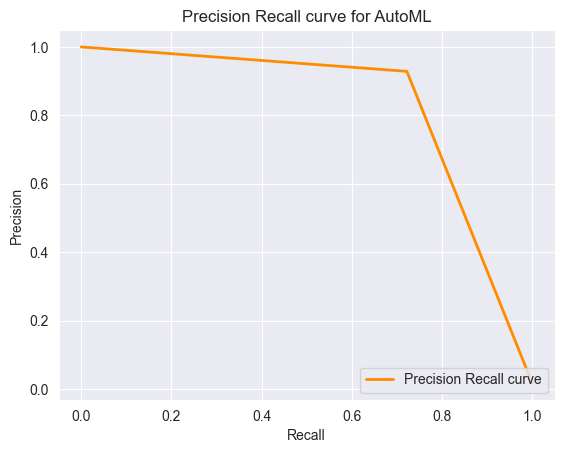

In [141]:
for model_name, items in all_metrics.items():
    precision, recall, _ = precision_recall_curve(y_true, items['predictions'])
    plt.figure()
    lw = 2
    plt.plot(recall, precision, color='darkorange',
            lw=lw, label=f'Precision Recall curve')
    plt.title(f'Precision Recall curve for {model_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="lower right")
    plt.savefig(f'../plots/precision_recall_curve/precision_recall_curve_{model_name}.png')
    plt.show()

# plot metrics DF for all models combined

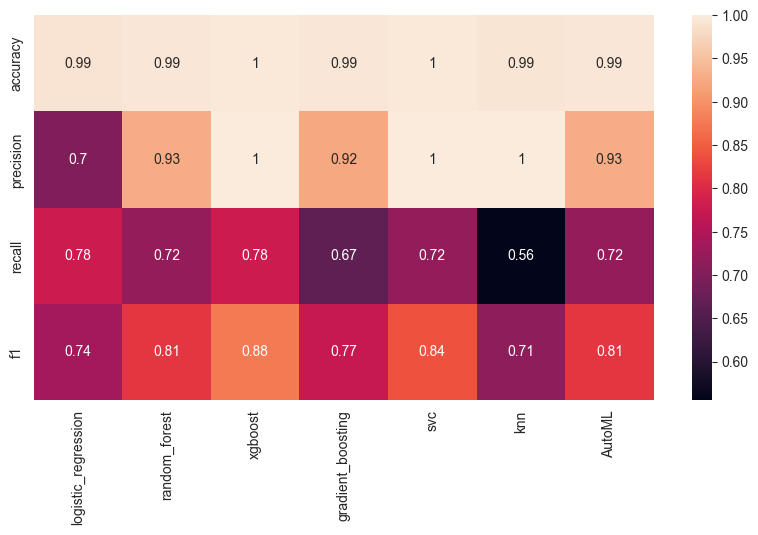

In [145]:
plt.figure(figsize=(10, 5))
sns.heatmap(df, annot=True, fmt='.2g')
plt.savefig('../plots/metrics_df.png')
plt.show()